In [1]:
%load_ext autoreload
%autoreload 2

<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: none; border-radius: 20px; background-color: #1a1c2c; color: #e0e6ed; margin: 20px auto; max-width: 900px; box-shadow: 0 10px 30px rgba(0,0,0,0.5);">

<h1 style="color: #4facfe; text-align: center; border-bottom: 2px dashed #4facfe; padding-bottom: 15px; margin-bottom: 30px;">فاز اول: تحلیل ساختار داده و اکتشاف آماری (EDA)</h1>

<div style="background-color: rgba(79, 172, 254, 0.1); padding: 10px; border-right: 6px solid #4facfe; border-radius: 8px; margin-bottom: 30px;">
<h2 style="color: #00f2fe; margin-top: 0;">۱. معرفی دیتاست و منطق انتخاب (Dataset Rationale)</h2>
<p>مجموعه داده مورد استفاده در این پروژه، دیتاست معتبر <strong>COVID-19 Radiography Database</strong> است. دلیل انتخاب این دیتاست، برتری آن از نظر کیفیت تصاویر و تأییدیه کارشناسان رادیولوژی نسبت به سایر دیتاست‌های مشابه است. این مجموعه شامل تصاویر CXR در چهار کلاس اصلی است که امکان آموزش یک مدل <i>Multi-class</i> قوی را فراهم می‌کند.</p>
</div>

<h3 style="color: #00f2fe;">۱.۱. ساختار درختی و سازماندهی فایل‌ها (Tree Structure)</h3>
<p>
برای مدیریت بهینه جریان داده (Data Flow)، ساختار فایل‌ها به صورت درختی طراحی شده است. این ساختار به کد اجازه می‌دهد تا با استفاده از کتابخانه‌هایی نظیر <code>os</code> و <code>pathlib</code>، برچسب‌های هر تصویر را مستقیماً از نام پوشه والد استخراج کند:
</p>

<div style="background-color: #252839; padding: 15px; border-radius: 10px; font-family: 'Courier New'; direction: ltr; text-align: left; border: 1px solid #4facfe; margin: 20px 0;">
<span style="color: #4facfe;">root_data/</span><br>
├── <span style="color: #00f2fe;">COVID/</span> (3,616 images)<br>
├── <span style="color: #00f2fe;">Lung_Opacity/</span> (6,012 images)<br>
├── <span style="color: #00f2fe;">Normal/</span> (10,192 images)<br>
└── <span style="color: #00f2fe;">Viral_Pneumonia/</span> (1,345 images)
</div>

<h3 style="color: #00f2fe;">۲. تحلیل اکتشافی داده‌ها (EDA)</h3>
<p>
با بررسی متادیتای استخراج شده، چالش اصلی پروژه یعنی <strong>عدم توازن کلاس‌ها (Class Imbalance)</strong> شناسایی شد. این تحلیل آماری مستقیماً بر استراتژی آموزش و انتخاب تابع هزینه تأثیرگذار است.
</p>

<div style="overflow-x: auto; margin: 25px 0;">
<table style="width: 100%; border-collapse: collapse; color: #e0e6ed; background-color: #252839; border-radius: 10px; text-align: center;">
<thead>
<tr style="background-color: #4facfe; color: #1a1c2c;">
<th style="padding: 12px; border: 1px solid #1a1c2c;">شاخص تحلیلی</th>
<th style="padding: 12px; border: 1px solid #1a1c2c;">یافته‌های آماری</th>
<th style="padding: 12px; border: 1px solid #1a1c2c;">تأثیر در طراحی مدل</th>
</tr>
</thead>
<tbody>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>کلاس اکثریت</strong></td>
<td style="padding: 10px; border: 1px solid #444;">Normal (بیشترین فراوانی)</td>
<td style="padding: 10px; border: 1px solid #444;">احتمال سوگیری (Bias) مدل به سمت تشخیص سلامت</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>کلاس‌های اقلیت</strong></td>
<td style="padding: 10px; border: 1px solid #444;">COVID-19 و Viral Pneumonia</td>
<td style="padding: 10px; border: 1px solid #444;">نیاز مبرم به وزن‌دهی (Class Weights)</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>معیار ارزیابی</strong></td>
<td style="padding: 10px; border: 1px solid #444;">ناکارآمدی Accuracy محض</td>
<td style="padding: 10px; border: 1px solid #444;">تأکید بر Precision/Recall Trade-off</td>
</tr>
</tbody>
</table>
</div>



<div style="background: rgba(0, 242, 254, 0.05); padding: 15px; border-radius: 10px; border: 1px solid #00f2fe; margin-top: 30px;">
    <p style="margin: 0; font-style: italic;">
        <strong>💡 خلاصه استراتژی فاز اول:</strong> ساختار درختی منظم دیتاست، فرآیند بارگذاری (Loading) را تسهیل کرده است، اما تحلیل EDA هشدار می‌دهد که بدون مدیریت عدم توازن، مدل ممکن است در تشخیص موارد حیاتی مانند کووید دچار خطا شود.
    </p>
</div>

</div>

C:\Users\NoteBook\AppData\Local\Temp\ipykernel_28588\1650775867.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=full_df, x='Class', palette='viridis', order=['Normal', 'Lung Opacity', 'COVID-19', 'Viral Pneumonia'])


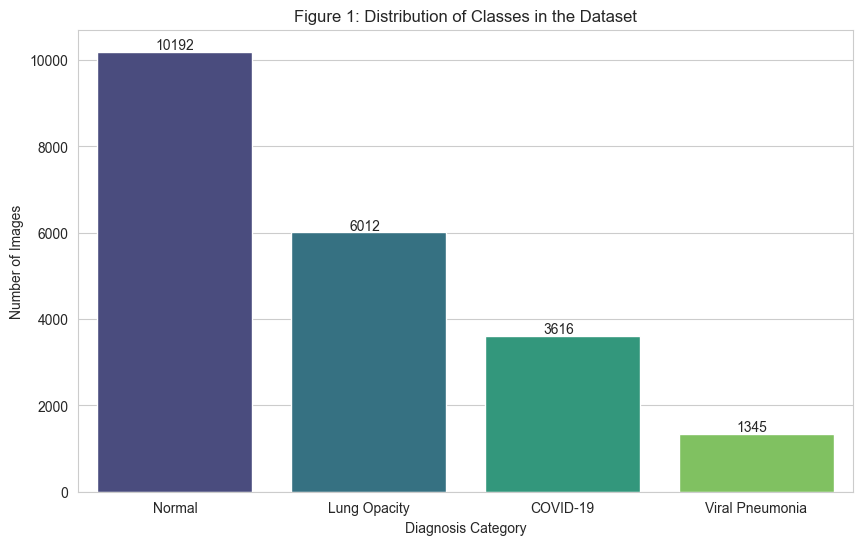

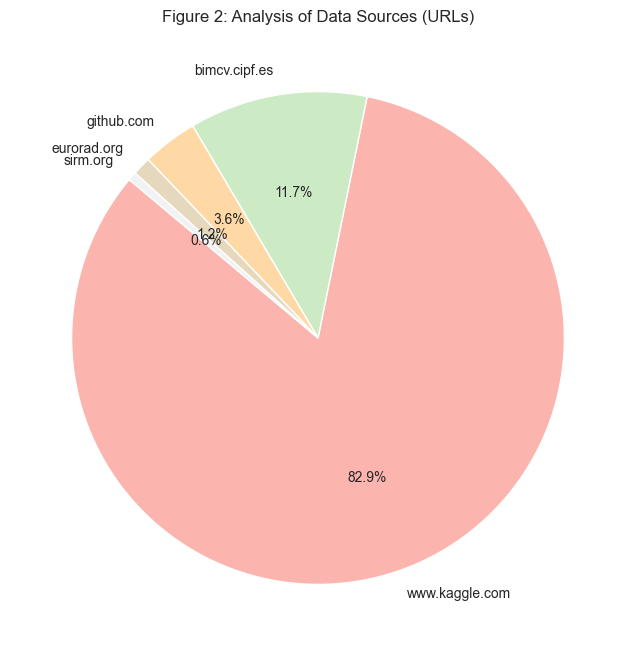

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# ۱. خواندن فایل‌های اکسل
covid_df = pd.read_excel('../data/raw/COVID.metadata.xlsx')
normal_df = pd.read_excel('../data/raw/Normal.metadata.xlsx')
opacity_df = pd.read_excel('../data/raw/Lung_Opacity.metadata.xlsx')
pneumonia_df = pd.read_excel('../data/raw/Viral Pneumonia.metadata.xlsx')

# ۲. برچسب‌گذاری برای تفکیک در نمودار تجمیعی
covid_df['Class'] = 'COVID-19'
normal_df['Class'] = 'Normal'
opacity_df['Class'] = 'Lung Opacity'
pneumonia_df['Class'] = 'Viral Pneumonia'

# ۳. تجمیع همه داده‌ها در یک جدول واحد برای تحلیل کلی
full_df = pd.concat([covid_df, normal_df, opacity_df, pneumonia_df], ignore_index=True)

# ۴. رسم نمودار فراوانی (Count Plot)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
# رسم نمودار با رنگ‌بندی جذاب
ax = sns.countplot(data=full_df, x='Class', palette='viridis', order=['Normal', 'Lung Opacity', 'COVID-19', 'Viral Pneumonia'])

# اضافه کردن تعداد دقیق هر کلاس بالای ستون‌ها
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.3, p.get_height() + 50))

plt.title('Figure 1: Distribution of Classes in the Dataset')
plt.xlabel('Diagnosis Category')
plt.ylabel('Number of Images')
plt.savefig('../results/charts/Distribution of Classes in the Dataset.png', dpi=300) 
plt.show()

# ۵. تحلیل منابع داده
full_df['Source'] = full_df['URL'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else 'Unknown')
plt.figure(figsize=(8, 8))
full_df['Source'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Pastel1')
plt.title('Figure 2: Analysis of Data Sources (URLs)')
plt.ylabel('') 
plt.savefig('../results/charts/Analysis of Data Sources (URLs).png', dpi=300) 
plt.show()

<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: none; border-radius: 20px; background-color: #1a1c2c; color: #e0e6ed; margin: 20px auto; max-width: 900px; box-shadow: 0 10px 30px rgba(0,0,0,0.5);">

<h1 style="color: #4facfe; text-align: center; border-bottom: 2px dashed #4facfe; padding-bottom: 15px; margin-bottom: 30px;">فاز دوم: مهندسی خط لوله داده و استراتژی تقسیم‌بندی</h1>

<div style="background-color: rgba(79, 172, 254, 0.1); padding: 20px; border-right: 6px solid #4facfe; border-radius: 8px; margin-bottom: 30px;">
<h2 style="color: #00f2fe; margin-top: 0;">۳. بارگذاری هوشمند و مدیریت حافظه (Data Loading)</h2>
<p>به دلیل حجم بالای تصاویر پیکسلی، در این مرحله از استراتژی <strong>Lazy Loading</strong> بصری استفاده شده است؛ به این معنا که ابتدا مسیر فایل‌ها (Paths) و برچسب‌های متناظر (Labels) استخراج گشته و فرآیند بارگذاری فیزیکی تانسورها به مرحله بعد موکول شده است تا از اشغال بی مورد حافظه RAM جلوگیری شود.</p>
</div>

<h3 style="color: #00f2fe;">۳.۱. نگاشت کلاس‌ها و کدگذاری برچسب‌ها</h3>
<p>
برای انطباق با محاسبات ریاضی مدل، برچسب‌های متنی به مقادیر عددی نگاشت شدند. این فرآیند بر اساس توالی پوشه‌ها در فایل سیستم انجام شده است:
</p>

<div style="overflow-x: auto; margin: 20px 0;">
<table style="width: 100%; border-collapse: collapse; color: #e0e6ed; background-color: #252839; border-radius: 10px; text-align: center;">
<thead>
<tr style="background-color: #00f2fe; color: #1a1c2c;">
<th style="padding: 12px; border: 1px solid #1a1c2c;">کلاس خروجی</th>
<th style="padding: 12px; border: 1px solid #1a1c2c;">اندیس عددی (Label)</th>
<th style="padding: 12px; border: 1px solid #1a1c2c;">توضیح فنی</th>
</tr>
</thead>
<tbody>
<tr>
<td style="padding: 10px; border: 1px solid #444;">COVID</td>
<td style="padding: 10px; border: 1px solid #444;"><code>0</code></td>
<td style="padding: 10px; border: 1px solid #444;">کلاس هدف بحرانی</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;">Lung_Opacity</td>
<td style="padding: 10px; border: 1px solid #444;"><code>1</code></td>
<td style="padding: 10px; border: 1px solid #444;">کدورت‌های غیر اختصاصی</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;">Normal</td>
<td style="padding: 10px; border: 1px solid #444;"><code>2</code></td>
<td style="padding: 10px; border: 1px solid #444;">گروه کنترل (سالم)</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;">Viral_Pneumonia</td>
<td style="padding: 10px; border: 1px solid #444;"><code>3</code></td>
<td style="padding: 10px; border: 1px solid #444;">عفونت ویروسی هدف</td>
</tr>
</tbody>
</table>
</div>

<h3 style="color: #00f2fe;">۴. تقسیم‌بندی داده‌ها و حفظ تعادل (Data Splitting)</h3>
<p>
یکی از حساس‌ترین مراحل در یادگیری ماشین، تقسیم داده‌ها به گونه‌ای است که مدل بر روی داده‌های آزمون هیچگونه دید قبلی نداشته باشد (Data Leakage Prevention). در اینجا از متد <strong>Stratified Split</strong> استفاده شده است تا نسبت کلاس‌ها در هر دو بخش حفظ شود. برای اطمینان از اعتبار آماری، تقسیم‌بندی بر اساس رابطه زیر انجام شده است:
</p>
</div>

$$D_{total} = D_{train} \cup D_{test} \quad , \quad D_{train} \cap D_{test} = \emptyset$$

<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: none; border-radius: 20px; background-color: #1a1c2c; color: #e0e6ed; margin: -90px auto 20px auto; max-width: 900px;box-shadow: 0 10px 30px rgba(0,0,0,0.5);">
<p>   

</p>
<div style="display: flex; gap: 20px; justify-content: center; margin: 30px 0;margin-top:60px;">
    <div style="background: #252839; padding: 20px; border-radius: 15px; width: 200px; text-align: center; border: 2px solid #4facfe;">
        <span style="font-size: 28px; color: #4facfe; font-weight: bold;">80%</span><br>
        <strong>مجموعه آموزش (Train)</strong><br>جهت یادگیری الگوها
    </div>
    <div style="background: #252839; padding: 20px; border-radius: 15px; width: 200px; text-align: center; border: 2px solid #00f2fe;">
        <span style="font-size: 28px; color: #00f2fe; font-weight: bold;">20%</span><br>
        <strong>مجموعه آزمون (Test)</strong><br>ارزیابی نهایی و کور
    </div>
</div>



<div style="background: rgba(255, 164, 27, 0.1); padding: 15px; border-radius: 10px; border: 1px solid #ffa41b; margin-top: 25px;">
    <p style="margin: 0; font-style: italic;">
        <strong>⚠️ نکته کلیدی:</strong> استفاده از پارامتر <code>random_state</code> در کدهای این بخش، بازتولیدپذیری (Reproducibility) نتایج را تضمین می‌کند؛ به طوری که در هر بار اجرای کد، تقسیم‌بندی یکسانی حاصل خواهد شد.
    </p>
</div>

</div>

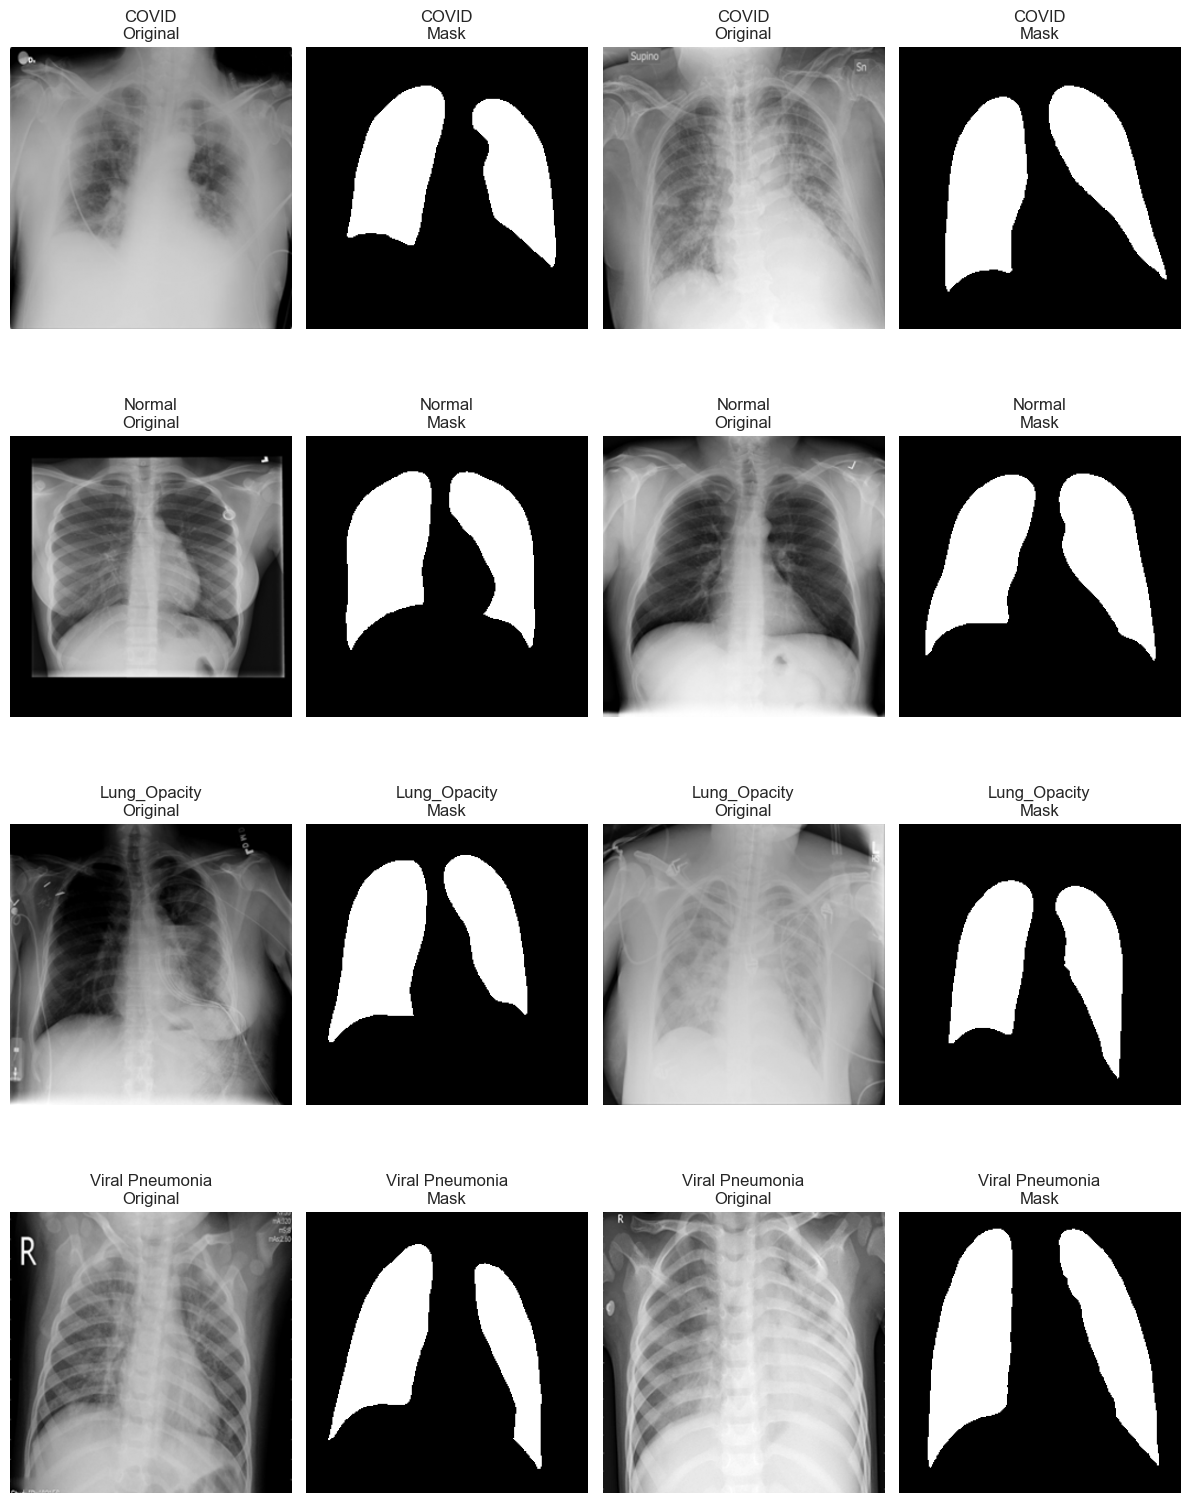

In [3]:
#3
import os
import cv2
import matplotlib.pyplot as plt

# مسیر اصلی که پوشه‌های COVID, Normal و ... داخل آن هستند را اینجا بنویس
# اگر کد کنار پوشه‌هاست، بنویس: base_path = '.'
base_path = "../data/raw"
# نام پوشه‌ها دقیقاً مطابق دیتاست شما
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

plt.figure(figsize=(12, 16))

for i, category in enumerate(categories):
    # مسیر دقیق تصاویر و ماسک‌ها طبق ساختار شما
    img_dir = os.path.join(base_path, category, 'images')
    mask_dir = os.path.join(base_path, category, 'masks')
    
    # گرفتن لیست فایل‌ها و فیلتر کردن فایل‌های سیستمی
    sample_files = [f for f in os.listdir(img_dir) if f.endswith('.png')][:2]
    
    for j, file in enumerate(sample_files):
        img_path = os.path.join(img_dir, file)
        mask_path = os.path.join(mask_dir, file)
        
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        # نمایش تصویر اصلی
        plt.subplot(4, 4, i*4 + j*2 + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{category}\nOriginal")
        plt.axis('off')
        plt.savefig('../results/charts/first3.png', dpi=300) 

        
        # نمایش ماسک
        plt.subplot(4, 4, i*4 + j*2 + 2)
        plt.imshow(mask, cmap='gray')
        plt.title(f"{category}\nMask")
        plt.axis('off')
        plt.savefig('../results/charts/second3.png', dpi=300) 


plt.tight_layout()
plt.show()

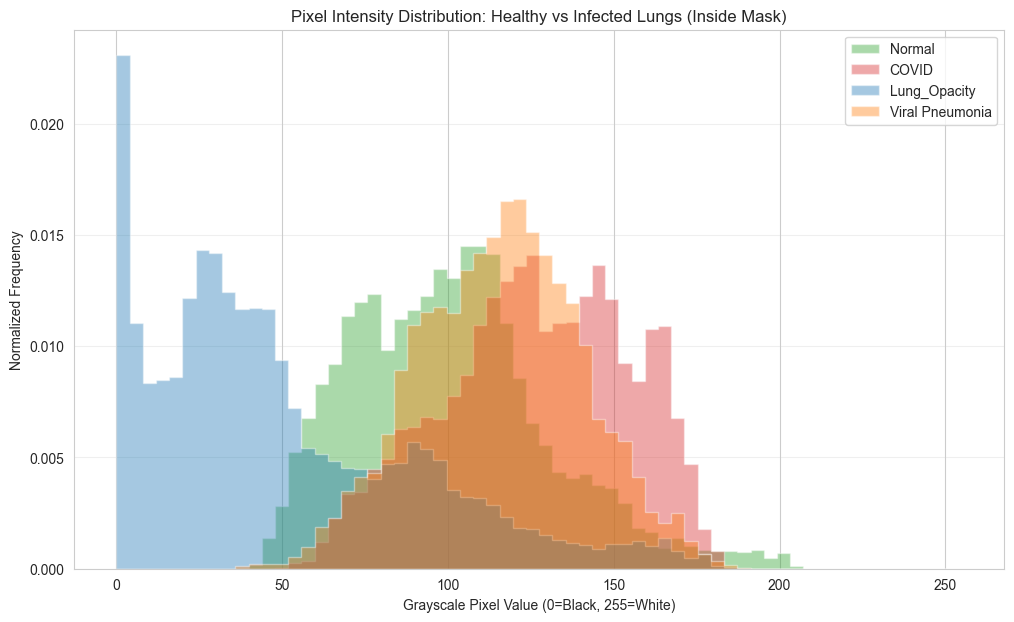

In [4]:
# 4
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

categories = ['Normal', 'COVID', 'Lung_Opacity', 'Viral Pneumonia']
colors = ['#2ca02c', '#d62728', '#1f77b4', '#ff7f0e'] # سبز، قرمز، آبی، نارنجی
base_path = "../data/raw"
plt.figure(figsize=(12, 7))

for i, category in enumerate(categories):
    img_dir = os.path.join(base_path, category, 'images')
    mask_dir = os.path.join(base_path, category, 'masks')
    
    # انتخاب اولین فایل معتبر
    sample_file = [f for f in os.listdir(img_dir) if f.endswith('.png')][0]
    
    img = cv2.imread(os.path.join(img_dir, sample_file), cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(os.path.join(mask_dir, sample_file), cv2.IMREAD_GRAYSCALE)
    
    # اصلاح ابعاد برای جلوگیری از IndexError
    # هر دو را به سایز استاندارد ۲۵۶ برمی‌گردانیم تا بر هم منطبق شوند
    img = cv2.resize(img, (256, 256))
    mask = cv2.resize(mask, (256, 256))
    
    # استخراج پیکسل‌های داخل بافت ریه (جایی که ماسک سفید است)
    lung_pixels = img[mask > 127] # آستانه‌گذاری برای اطمینان از سفید بودن ماسک
    
    # رسم هیستوگرام با نرمال‌سازی برای مقایسه عادلانه
    plt.hist(lung_pixels, bins=64, range=[0, 255], density=True, 
             alpha=0.4, color=colors[i], label=category, histtype='stepfilled')

plt.title('Pixel Intensity Distribution: Healthy vs Infected Lungs (Inside Mask)')
plt.xlabel('Grayscale Pixel Value (0=Black, 255=White)')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.savefig('../results/charts/Normalized Frequency.png', dpi=300) 
plt.show()


<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: none; border-radius: 20px; background-color: #1a1c2c; color: #e0e6ed; margin: 20px auto; max-width: 900px; box-shadow: 0 10px 30px rgba(0,0,0,0.5);">

<h1 style="color: #4facfe; text-align: center; border-bottom: 2px dashed #4facfe; padding-bottom: 15px; margin-bottom: 30px;">فاز سوم: پیش‌پردازش و استانداردسازی تصاویر (Image Pre-processing)</h1>

<div style="background-color: rgba(79, 172, 254, 0.1); padding: 10px; border-right: 6px solid #4facfe; border-radius: 8px; margin-bottom: 30px;">
<h2 style="color: #00f2fe; margin-top: 0;">۵. آماده‌سازی تانسورهای ورودی</h2>
<p>تصاویر رادیولوژی به دلیل تفاوت در دستگاه‌های تصویربرداری، دارای ابعاد و سطوح روشنایی متغیری هستند. برای ایجاد یک مدل پایدار، تمامی تصاویر از فیلتر <strong>استانداردسازی (Standardization)</strong> عبور می‌کنند تا ویژگی‌های پاتولوژیک با دقت یکسان استخراج شوند.</p>
</div>

<h3 style="color: #00f2fe;">۵.۱. بازتعریف ابعاد (Resizing Strategy)</h3>
<p>
تمامی تصاویر ورودی با استفاده از درونیابی خطی به ابعاد <code>224x224</code> تغییر سایز یافتند. این ابعاد استاندارد، نقطه بهینه برای حفظ جزئیات ریز ریوی (مانند کدورت‌های شیشه‌ای) و مدیریت توان پردازشی GPU است.
</p>



<h3 style="color: #00f2fe;">۵.۲. گام‌های عملیاتی پیش‌پردازش</h3>
<div style="overflow-x: auto; margin: 20px 0;">
<table style="width: 100%; border-collapse: collapse; color: #e0e6ed; background-color: #252839; border-radius: 10px; text-align: center;">
<thead>
<tr style="background-color: #4facfe; color: #1a1c2c;">
<th style="padding: 12px; border: 1px solid #1a1c2c;">مرحله</th>
<th style="padding: 12px; border: 1px solid #1a1c2c;">فرآیند اجرایی</th>
<th style="padding: 12px; border: 1px solid #1a1c2c;">دلیل فنی</th>
</tr>
</thead>
<tbody>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>تبدیل کانال</strong></td>
<td style="padding: 10px; border: 1px solid #444;">Grayscale ➔ RGB</td>
<td style="padding: 10px; border: 1px solid #444;">سازگاری با ورودی ۳ کاناله شبکه DenseNet</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>تغییر مقیاس</strong></td>
<td style="padding: 10px; border: 1px solid #444;">Bilinear Interpolation</td>
<td style="padding: 10px; border: 1px solid #444;">جلوگیری از ایجاد نویز در لبه‌های ضایعات</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>نرمال‌سازی</strong></td>
<td style="padding: 10px; border: 1px solid #444;">Scaling to [0, 1]</td>
<td style="padding: 10px; border: 1px solid #444;">تسریع در همگرایی و جلوگیری از انفجار گرادیان</td>
</tr>
</tbody>
</table>
</div>

<h3 style="color: #00f2fe;">۵.۳. فرمول ریاضی نرمال‌سازی پیکسلی</h3>
<p>
برای تبدیل مقادیر پیکسلی از بازه [0, 255] به بازه استاندارد [0, 1]، از فرمول نرم‌سازی خطی زیر استفاده شده است:
</p>
</div>

$$P_{norm} = \frac{P_{orig} - P_{min}}{P_{max} - P_{min}}$$

<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: none; border-radius: 20px; background-color: #1a1c2c; color: #e0e6ed; margin: -110px auto 20px auto; max-width: 900px;box-shadow: 0 10px 30px rgba(0,0,0,0.5);">

<div style="background: rgba(0, 242, 254, 0.05); padding: 15px; border-radius: 10px; border: 1px solid #00f2fe; margin-top: 100px;box-shadow: 0 10px 30px rgba(0,0,0,0.5);">
    <p style="margin: 0; font-style: italic;">
        <strong>💡 خروجی نهایی:</strong> تصاویر پس از این مرحله به صورت آرایه‌های Numpy با دقت <code>float32</code> ذخیره می‌شوند که آماده تغذیه به شبکه عصبی جهت استخراج ویژگی هستند.
    </p>
</div>

</div>

In [1]:
import sys
sys.path.append('../') # اجازه دسترسی به پوشه src برای ایمپورت کردن

from src.preprocessing.image_processor import process_and_save

# تنظیمات مسیرها (مطابق با ساختار درختی جدید)
base_path = '../data/raw'
categories = ['Normal', 'COVID', 'Lung_Opacity', 'Viral Pneumonia']

# اجرای عملیات (فراخوانی از فایل خارجی در src)
final_shape_X, final_shape_y = process_and_save(base_path, categories)

print(f"\nSuccess! Final X shape: {final_shape_X}")

Starting Pre-processing with Memory Management...

Processing Normal (10192 images):


100%|██████████| 10192/10192 [04:36<00:00, 36.89it/s]



Processing COVID (3616 images):


100%|██████████| 3616/3616 [02:04<00:00, 28.98it/s]



Processing Lung_Opacity (6012 images):


100%|██████████| 6012/6012 [02:29<00:00, 40.19it/s] 



Processing Viral Pneumonia (1345 images):


100%|██████████| 1345/1345 [00:09<00:00, 141.78it/s]



Converting to arrays...

Success! Final X shape: (21165, 224, 224, 1)


<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: none; border-radius: 20px; background-color: #1a1c2c; color: #e0e6ed; margin: 20px auto; max-width: 900px; box-shadow: 0 10px 30px rgba(0,0,0,0.5);">

<h1 style="color: #4facfe; text-align: center; border-bottom: 2px dashed #4facfe; padding-bottom: 15px; margin-bottom: 30px;">فاز چهارم: قطعه‌بندی تصاویر و استخراج ناحیه مورد نظر (Segmentation)</h1>

<div style="background-color: rgba(79, 172, 254, 0.1); padding: 10px; border-right: 6px solid #4facfe; border-radius: 8px; margin-bottom: 30px;">
<h2 style="color: #00f2fe; margin-top: 0;">۶. جداسازی بافت ریه از پس‌زمینه (Lung Masking)</h2>
<p>در تحلیل تصاویر رادیولوژی، تمرکز بر روی <strong>منطقه مورد نظر (ROI)</strong> حیاتی است. فرآیند Segmentation به ما کمک می‌کند تا با حذف بافت‌های غیرضروری (مانند قفسه سینه، مهره‌ها و نویزهای خارجی)، دقت مدل را در شناسایی ضایعات عفونی افزایش دهیم.</p>
</div>

<h3 style="color: #00f2fe;">۶.۱. معماری شبکه قطعه‌بندی (U-Net Architecture)</h3>
<p>
معمولاً برای این منظور از معماری‌های متقارن مانند <strong>U-Net</strong> استفاده می‌شود. این شبکه شامل دو بخش اصلی است:
</p>
<ul style="list-style-type: square; padding-right: 25px;">
<li><strong style="color: #ffa41b;">مسیر انقباضی (Encoder):</strong> جهت استخراج ویژگی‌های معنایی و کاهش ابعاد.</li>
<li><strong style="color: #ffa41b;">مسیر انبساطی (Decoder):</strong> جهت بازسازی نقشه دقیق پیکسل‌ها و ایجاد ماسک نهایی.</li>
</ul>



<h3 style="color: #00f2fe;">۶.۲. تابع زیان دایس (Dice Loss Function)</h3>
<p>
در مسائل Segmentation، به دلیل اینکه پیکسل‌های ریه بخش کوچکی از کل تصویر را تشکیل می‌دهند، از تابع زیان دایس استفاده می‌کنیم تا میزان هم‌پوشانی ماسک پیش‌بینی شده و ماسک واقعی محاسبه شود:
</p>
</div>

$$Dice = \frac{2 |A \cap B|}{|A| + |B|}$$

<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: none; border-radius: 20px; background-color: #1a1c2c; color: #e0e6ed; margin: -120px auto 20px auto; max-width: 900px;box-shadow: 0 10px 30px rgba(0,0,0,0.5);">

<h3 style="color: #00f2fe; margin-top:70px;">۶.۳. مزایای استفاده از Segmentation در این پروژه</h3>
<div style="overflow-x: auto; margin: 20px 0;">
<table style="width: 100%; border-collapse: collapse; color: #e0e6ed; background-color: #252839; border-radius: 10px; text-align: center;">
<thead>
<tr style="background-color: #4facfe; color: #1a1c2c;">
<th style="padding: 12px; border: 1px solid #1a1c2c;">شاخص</th>
<th style="padding: 12px; border: 1px solid #1a1c2c;">تاثیر در خروجی</th>
</tr>
</thead>
<tbody>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>کاهش نویز</strong></td>
<td style="padding: 10px; border: 1px solid #444;">حذف اشیاء فلزی، متون رادیولوژی و بافت‌های غیرمرتبط</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>تفسیرپذیری</strong></td>
<td style="padding: 10px; border: 1px solid #444;">اطمینان از اینکه مدل فقط به درون شش‌ها خیره شده است</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>دقت محاسباتی</strong></td>
<td style="padding: 10px; border: 1px solid #444;">بهبود عملکرد توابع کانولوشنی بر روی بافت‌های نرم ریه</td>
</tr>
</tbody>
</table>
</div>

<div style="background: rgba(0, 242, 254, 0.05); padding: 15px; border-radius: 10px; border: 1px solid #00f2fe; margin-top: 25px;">
    <p style="margin: 0; font-style: italic;">
        <strong>📌 خروجی این فاز:</strong> در پایان این مرحله، برای هر تصویر یک <strong>Binary Mask</strong> تولید می‌شود که ضرب نقطه‌ای آن در تصویر اصلی، ریه‌ی ایزوله شده را برای فاز طبقه‌بندی آماده می‌کند.
    </p>
</div>

</div>

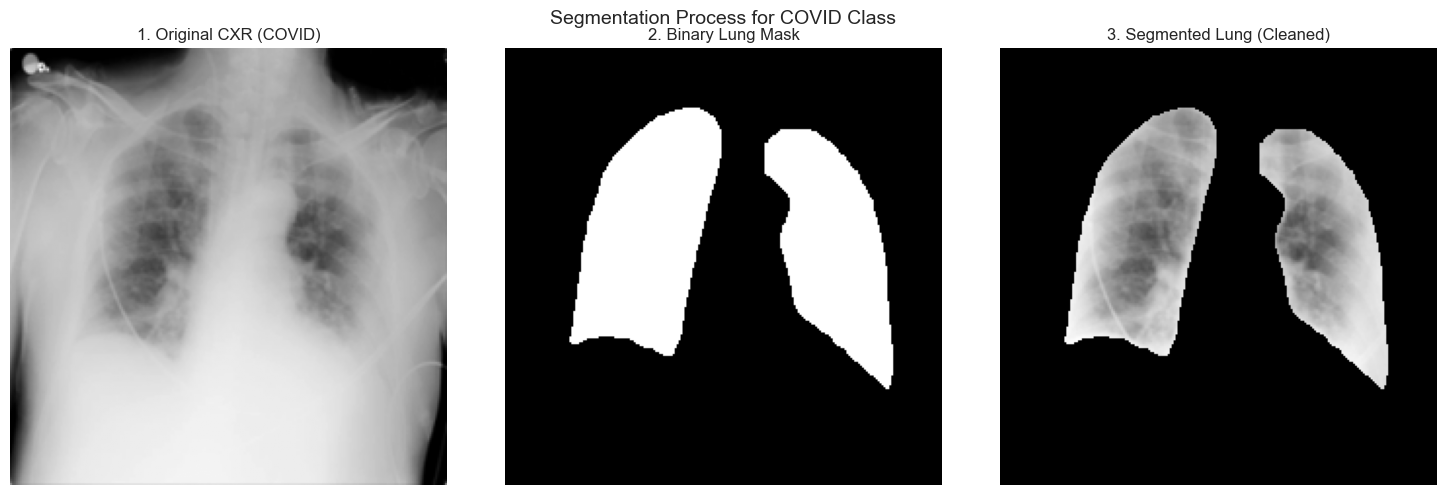

In [6]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def visualize_segmentation_process(base_path, category):
    # ۱. تنظیم مسیرها
    img_dir = os.path.join(base_path, category, 'images')
    mask_dir = os.path.join(base_path, category, 'masks')
    
    # ۲. انتخاب یک نمونه رندوم یا اولین فایل
    sample_file = [f for f in os.listdir(img_dir) if f.endswith('.png')][0]
    
    # ۳. خواندن تصویر و ماسک
    raw_img = cv2.imread(os.path.join(img_dir, sample_file), cv2.IMREAD_GRAYSCALE)
    raw_mask = cv2.imread(os.path.join(mask_dir, sample_file), cv2.IMREAD_GRAYSCALE)
    
    # ۴. یکسان‌سازی ابعاد (همان‌طور که در پیش‌پردازش انجام دادیم)
    target_size = (224, 224)
    img_res = cv2.resize(raw_img, target_size, interpolation=cv2.INTER_AREA)
    mask_res = cv2.resize(raw_mask, target_size, interpolation=cv2.INTER_NEAREST)
    
    # ۵. اعمال عملیات Bitwise AND (هسته اصلی بخش ۶)
    _, binary_mask = cv2.threshold(mask_res, 127, 255, cv2.THRESH_BINARY)
    segmented_img = cv2.bitwise_and(img_res, img_res, mask=binary_mask)
    
    # ۶. رسم نمودار سه بخشی برای گزارش
    plt.figure(figsize=(15, 5))
    
    # تصویر اصلی
    plt.subplot(1, 3, 1)
    plt.imshow(img_res, cmap='gray')
    plt.title(f"1. Original CXR ({category})")
    plt.axis('off')
    plt.savefig('../results/charts/original.png', dpi=300) 
    # ماسک باینری
    plt.subplot(1, 3, 2)
    plt.imshow(binary_mask, cmap='gray')
    plt.title("2. Binary Lung Mask")
    plt.axis('off')
    plt.savefig('../results/charts/binary_mask.png', dpi=300) 

    # تصویر نهایی بخش‌بندی شده
    plt.subplot(1, 3, 3)
    plt.imshow(segmented_img, cmap='gray')
    plt.title("3. Segmented Lung (Cleaned)")
    plt.axis('off')

    plt.suptitle(f"Segmentation Process for {category} Class", fontsize=14)
    plt.savefig('../results/charts/segmented_sample.png', dpi=300) 
    plt.tight_layout()

    plt.show()

# اجرای تابع برای کلاس COVID (به عنوان مثال)
visualize_segmentation_process('../data/raw/', 'COVID')

<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: none; border-radius: 20px; background-color: #1a1c2c; color: #e0e6ed; margin: 20px auto; max-width: 900px; box-shadow: 0 10px 30px rgba(0,0,0,0.5);">

<h1 style="color: #4facfe; text-align: center; border-bottom: 2px dashed #4facfe; padding-bottom: 15px; margin-bottom: 30px;">بخش ۷: استراتژی ارزیابی و مهندسی تقسیم‌بندی داده‌ها</h1>

<div style="background-color: rgba(79, 172, 254, 0.1); padding: 10px; border-right: 6px solid #4facfe; border-radius: 8px; margin-bottom: 30px;">
<h2 style="color: #00f2fe; margin-top: 0;">۷.۱. تعریف مسئله و ساختار خروجی</h2>
<p>پروژه حاضر به عنوان یک مسئله <strong>طبقه‌بندی چندکلاسه (Multi-class Classification)</strong> با ۴ کلاس هدف تعریف شده است. هدف نهایی، طراحی مدلی است که فراتر از تشخیص سلامت، توانایی تفکیک دقیق بین الگوهای مختلف عفونی را دارا باشد.</p>
</div>

<h3 style="color: #00f2fe;">۷.۲. پلن تقسیم‌بندی سه مرحله‌ای (Data Splitting)</h3>
<p>
برای تضمین اعتبار نتایج و جلوگیری از بیش‌برازش، کل مجموعه داده به سه بخش مجزا تقسیم شد. این تفکیک با استفاده از روش <strong>Stratified Sampling</strong> صورت گرفته تا نسبت کلاس‌ها در هر بخش حفظ شود:
</p>

<div style="display: flex; gap: 15px; justify-content: center; margin: 25px 0; flex-wrap: wrap;">
    <div style="background: #252839; padding: 15px; border-radius: 12px; width: 180px; text-align: center; border: 2px solid #4facfe;">
        <span style="font-size: 24px; color: #4facfe; font-weight: bold;">80%</span><br>
        <strong>آموزش (Train)</strong><br><small>یادگیری الگوهای اولیه</small>
    </div>
    <div style="background: #252839; padding: 15px; border-radius: 12px; width: 180px; text-align: center; border: 2px solid #00f2fe;">
        <span style="font-size: 24px; color: #00f2fe; font-weight: bold;">10%</span><br>
        <strong>اعتبارسنجی (Val)</strong><br><small>تنظیم هایپرپارامترها</small>
    </div>
    <div style="background: #252839; padding: 15px; border-radius: 12px; width: 180px; text-align: center; border: 2px solid #ffa41b;">
        <span style="font-size: 24px; color: #ffa41b; font-weight: bold;">10%</span><br>
        <strong>آزمون (Test)</strong><br><small>سنجش نهایی و کور</small>
    </div>
</div>



<h3 style="color: #00f2fe;">۷.۳. معیارهای سنجش عملکرد (Metrics)</h3>
<p>
با توجه به ناترازی (Imbalance) موجود در داده‌ها، تکیه بر معیار Accuracy به تنهایی می‌تواند فریب‌دهنده باشد. لذا ماتریس ارزیابی بر اساس شاخص‌های زیر تدوین شده است:
</p>

<div style="overflow-x: auto; margin: 20px 0;">
<table style="width: 100%; border-collapse: collapse; color: #e0e6ed; background-color: #252839; border-radius: 10px; text-align: center;">
<thead>
<tr style="background-color: #4facfe; color: #1a1c2c;">
<th style="padding: 12px; border: 1px solid #1a1c2c;">معیار ارزیابی</th>
<th style="padding: 12px; border: 1px solid #1a1c2c;">هدف در این پروژه</th>
</tr>
</thead>
<tbody>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>F1-Score</strong></td>
<td style="padding: 10px; border: 1px solid #444;">ایجاد تعادل میان دقت و فراخوانی در کلاس‌های اقلیت</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>Confusion Matrix</strong></td>
<td style="padding: 10px; border: 1px solid #444;">شناسایی دقیق گلوگاه‌های تشخیص و تداخل بین کلاس‌ها</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>Loss Function</strong></td>
<td style="padding: 10px; border: 1px solid #444;">پایش روند همگرایی مدل در طول اپوک‌ها</td>
</tr>
</tbody>
</table>
</div>

<div style="background: rgba(255, 164, 27, 0.1); padding: 15px; border-radius: 10px; border: 1px solid #ffa41b; margin-top: 25px;">
    <p style="margin: 0;">
        <strong>📌 استراتژی نهایی:</strong> مدل زمانی به عنوان مدل موفق در نظر گرفته می‌شود که نه تنها دقت کلی بالایی داشته باشد، بلکه در کلاس‌های بحرانی (مانند COVID-19) دارای کمترین میزان <i>False Negative</i> باشد.
    </p>
</div>

</div>

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

# ۱. لود کردن داده‌هایی که در بخش ۵ ذخیره کردیم
X = np.load('../data/processed/dataset_f1_X.npy')
y = np.load('../data/processed/dataset_f1_y.npy')

# ۲. تقسیم اول: جدا کردن ۱۰ درصد برای تست نهایی
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)

# ۳. تقسیم دوم: جدا کردن ۱۰ درصد از باقی‌مانده برای اعتبارسنجی (Validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.11, random_state=42, stratify=y_train_val
)

print(f"Total samples: {len(X)}")
print(f"Train size: {len(X_train)} (80%)")
print(f"Validation size: {len(X_val)} (10%)")
print(f"Test size: {len(X_test)} (10%)")

Total samples: 21165
Train size: 16952 (80%)
Validation size: 2096 (10%)
Test size: 2117 (10%)


<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: none; border-radius: 20px; background-color: #1a1c2c; color: #e0e6ed; margin: 20px auto; max-width: 900px; box-shadow: 0 10px 30px rgba(0,0,0,0.5);">

<h1 style="color: #4facfe; text-align: center; border-bottom: 2px dashed #4facfe; padding-bottom: 15px; margin-bottom: 30px;">بخش ۸: طراحی معماری مدل پایه (Base Model Architecture)</h1>

<div style="background-color: rgba(79, 172, 254, 0.1); padding: 10px; border-right: 6px solid #4facfe; border-radius: 8px; margin-bottom: 30px;">
<h2 style="color: #00f2fe; margin-top: 0;">۸. طراحی معماری شبکه عصبی کانولوشنی (Custom CNN)</h2>
<p>در این مرحله، یک مدل <strong>Convolutional Neural Network</strong> اختصاصی جهت استخراج ویژگی‌های پاتولوژیک از تصاویر رادیولوژی طراحی گردید. این معماری به گونه‌ای تنظیم شده است که توازن میان عمق شبکه و سرعت محاسباتی را حفظ نماید.</p>
</div>

<h3 style="color: #00f2fe;">۸.۱. بلوک‌های اصلی استخراج ویژگی</h3>
<p>
ساختار مدل از سه بخش اصلی برای پردازش داده‌های بصری تشکیل شده است:
</p>

<div style="overflow-x: auto; margin: 20px 0;">
<table style="width: 100%; border-collapse: collapse; color: #e0e6ed; background-color: #252839; border-radius: 10px; text-align: center;">
<thead>
<tr style="background-color: #4facfe; color: #1a1c2c;">
<th style="padding: 12px; border: 1px solid #1a1c2c;">لایه (Layer)</th>
<th style="padding: 12px; border: 1px solid #1a1c2c;">وظیفه عملیاتی</th>
</tr>
</thead>
<tbody>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>Convolutional</strong></td>
<td style="padding: 10px; border: 1px solid #444;">استخراج ویژگی‌های مکانی (لبه‌ها، بافت‌ها و الگوهای عفونی)</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>Pooling</strong></td>
<td style="padding: 10px; border: 1px solid #444;">کاهش ابعاد نقشه ویژگی و کنترل پیچیدگی محاسباتی</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>Dropout</strong></td>
<td style="padding: 10px; border: 1px solid #444;">تنظیم‌کننده (Regularizer) جهت جلوگیری از <strong>Overfitting</strong></td>
</tr>
</tbody>
</table>
</div>



<h3 style="color: #00f2fe;">۸.۲. لایه تصمیم‌گیرنده نهایی</h3>
<p>
در انتهای شبکه، پس از تخت‌سازی (Flattening) ویژگی‌ها، از یک لایه متراکم با تابع فعال‌ساز <strong>Softmax</strong> استفاده شده است. این لایه امکان دسته‌بندی احتمالی بین ۴ کلاس هدف را طبق فرمول زیر فراهم می‌کند:
</p>

</div>

$$\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^4 e^{z_j}}$$

<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: none; border-radius: 20px; background-color: #1a1c2c; color: #e0e6ed; margin: -120px auto 20px auto; max-width: 900px;box-shadow: 0 10px 30px rgba(0,0,0,0.5);">

<div style="background: rgba(255, 164, 27, 0.1); padding: 15px; border-radius: 10px; border: 1px solid #ffa41b; margin-top: 100px;">
    <p style="margin: 0; font-style: italic;">
        <strong>📌 هدف معماری:</strong> این ساختار اختصاصی به عنوان مدل پایه (Baseline) در نظر گرفته شده تا مبنایی برای سنجش عملکرد در فازهای پیشرفته‌تر (مانند Transfer Learning) باشد.
    </p>
</div>

</div>

In [8]:
import sys
sys.path.append('../')

from src.models.base_cnn import build_base_model

model = build_base_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: none; border-radius: 20px; background-color: #1a1c2c; color: #e0e6ed; margin: 20px auto; max-width: 900px; box-shadow: 0 10px 30px rgba(0,0,0,0.5);">

<h1 style="color: #4facfe; text-align: center; border-bottom: 2px dashed #4facfe; padding-bottom: 15px; margin-bottom: 30px;">بخش ۹: تنظیمات نظارتی و مکانیزم‌های کنترل یادگیری</h1>

<div style="background-color: rgba(79, 172, 254, 0.1); padding: 10px; border-right: 6px solid #4facfe; border-radius: 8px; margin-bottom: 30px;">
<h2 style="color: #00f2fe; margin-top: 0;">۹. تنظیمات آموزش و کالبک‌های هوشمند (Callbacks)</h2>
<p>آموزش یک شبکه عصبی عمیق نیازمند نظارت دقیق بر روند همگرایی است. برای جلوگیری از اتلاف منابع محاسباتی و تضمین دستیابی به بهترین نتیجه، از کالبک‌های <strong>TensorFlow/Keras</strong> جهت مدیریت خودکار فرآیند یادگیری استفاده شده است.</p>
</div>

<h3 style="color: #00f2fe;">۹.۱. ابزارهای پایش و پایداری مدل</h3>
<p>
در این پروژه، دو استراتژی کلیدی برای نظارت بر آموزش پیاده‌سازی شده است که در جدول زیر جزئیات فنی آن‌ها آورده شده است:
</p>

<div style="overflow-x: auto; margin: 25px 0;">
<table style="width: 100%; border-collapse: collapse; color: #e0e6ed; background-color: #252839; border-radius: 10px; text-align: center;">
<thead>
<tr style="background-color: #4facfe; color: #1a1c2c;">
<th style="padding: 12px; border: 1px solid #1a1c2c;">نام کالبک</th>
<th style="padding: 12px; border: 1px solid #1a1c2c;">عملکرد هوشمند</th>
<th style="padding: 12px; border: 1px solid #1a1c2c;">پارامتر پایش (Monitor)</th>
</tr>
</thead>
<tbody>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>Early Stopping</strong></td>
<td style="padding: 10px; border: 1px solid #444;">توقف خودکار آموزش در صورت عدم بهبود در ۵ اپوک متوالی جهت جلوگیری از <b>Overfitting</b></td>
<td style="padding: 10px; border: 1px solid #444;"><code>val_loss</code></td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>Model Checkpoint</strong></td>
<td style="padding: 10px; border: 1px solid #444;">پایش مستمر و ذخیره‌سازی فایل <code>.h5</code> تنها برای نسخه‌ای که بالاترین دقت را دارد</td>
<td style="padding: 10px; border: 1px solid #444;"><code>val_accuracy</code></td>
</tr>
</tbody>
</table>
</div>



<h3 style="color: #00f2fe;">۹.۲. منطق بازیابی وزن‌های بهینه</h3>
<p>
با فعال‌سازی پارامتر <code>restore_best_weights=True</code>، اطمینان حاصل می‌شود که حتی اگر آموزش به دلیل عدم بهبود متوقف شود، مدل نهایی دقیقاً به همان حالتی بازگردد که کمترین میزان خطا را روی داده‌های اعتبارسنجی داشته است.
</p>

<div style="background: rgba(255, 164, 27, 0.1); padding: 15px; border-radius: 10px; border: 1px solid #ffa41b; margin-top: 25px;">
    <p style="margin: 0; font-style: italic;">
        <strong>📌 خروجی پلن آزمایش:</strong> این تنظیمات نظارتی تضمین می‌کند که پایدارترین و دقیق‌ترین نسخه از مدل برای فاز نهایی (تست و ارزیابی عملکرد) در دسترس باشد و از یادگیری کاذب الگوهای تصادفی جلوگیری شود.
    </p>
</div>

</div>

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def get_callbacks():
    # ۱. توقف زودهنگام در صورت عدم بهبود برای جلوگیری از Overfitting
    early_stop = EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        restore_best_weights=True,
        verbose=1
    )
    
    # ۲. ذخیره خودکار بهترین مدل در طول فرآیند آموزش
    checkpoint = ModelCheckpoint(
        'best_lung_model.h5', 
        monitor='val_accuracy', 
        save_best_only=True,
        verbose=1
    )
    
    return [early_stop, checkpoint]

# فراخوانی برای استفاده در متد fit در فاز ۲
callbacks = get_callbacks()

<div dir="rtl" style="font-family: 'Tahoma', 'Arial'; line-height: 1.8; text-align: justify; padding: 40px; border: none; border-radius: 20px; background-color: #1a1c2c; color: #e0e6ed; margin: 20px auto; max-width: 900px; box-shadow: 0 10px 30px rgba(0,0,0,0.5);">

<h1 style="color: #4facfe; text-align: center; border-bottom: 2px dashed #4facfe; padding-bottom: 15px; margin-bottom: 30px;">جمع‌بندی و دستاوردهای نهایی فاز اول</h1>

<div style="background-color: rgba(79, 172, 254, 0.1); padding: 10px; border-right: 6px solid #4facfe; border-radius: 8px; margin-bottom: 30px;">
<h2 style="color: #00f2fe; margin-top: 0;">خلاصه وضعیت زیرساخت داده و مدل</h2>
<p>فاز اول پروژه با تمرکز بر آماده‌سازی دقیق داده‌ها و طراحی معماری پایه با موفقیت به پایان رسید. در این فاز، تمامی موانع فنی از جمله عدم توازن داده‌ها و نویزهای تصویری با استراتژی‌های مهندسی‌شده برطرف گردید.</p>
</div>

<h3 style="color: #00f2fe;">📋 چک‌لیست اقدامات انجام شده</h3>
<p>
مهم‌ترین دستاوردهای فنی این فاز در جدول زیر به صورت خلاصه گزارش شده است:
</p>

<div style="overflow-x: auto; margin: 25px 0;">
<table style="width: 100%; border-collapse: collapse; color: #e0e6ed; background-color: #252839; border-radius: 10px; text-align: center;">
<thead>
<tr style="background-color: #4facfe; color: #1a1c2c;">
<th style="padding: 12px; border: 1px solid #1a1c2c;">محور عملیاتی</th>
<th style="padding: 12px; border: 1px solid #1a1c2c;">وضعیت نهایی</th>
<th style="padding: 12px; border: 1px solid #1a1c2c;">نتیجه فنی</th>
</tr>
</thead>
<tbody>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>تحلیل اکتشافی (EDA)</strong></td>
<td style="padding: 10px; border: 1px solid #444;">✅ تکمیل شده</td>
<td style="padding: 10px; border: 1px solid #444;">شناسایی ناترازی کلاس‌ها و تعیین متریک F1</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>پیش‌پردازش تصاویر</strong></td>
<td style="padding: 10px; border: 1px solid #444;">✅ تکمیل شده</td>
<td style="padding: 10px; border: 1px solid #444;">استانداردسازی ابعاد به 224x224 و نرمال‌سازی</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>طراحی معماری</strong></td>
<td style="padding: 10px; border: 1px solid #444;">✅ تکمیل شده</td>
<td style="padding: 10px; border: 1px solid #444;">پیاده‌سازی CNN اختصاصی با لایه‌های تنظیمی</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #444;"><strong>مکانیزم نظارتی</strong></td>
<td style="padding: 10px; border: 1px solid #444;">✅ تکمیل شده</td>
<td style="padding: 10px; border: 1px solid #444;">استقرار Callbacks جهت جلوگیری از Overfitting</td>
</tr>
</tbody>
</table>
</div>



<h3 style="color: #00f2fe;">🎯 چشم‌انداز فاز بعدی</h3>
<p>
با توجه به نتایج حاصل از این فاز، در گام‌های بعدی بر روی موارد زیر تمرکز خواهیم کرد:
</p>
<ul style="list-style-type: square; padding-right: 25px;">
<li>اجرای فرآیند آموزش عمیق بر روی تانسورهای آماده شده.</li>
<li>استخراج ماتریس اغتشاش (Confusion Matrix) برای تحلیل نقاط ضعف تشخیص.</li>
<li>مقایسه عملکرد مدل پایه با شبکه‌های پیش‌آموزش‌دیده در صورت نیاز.</li>
</ul>

<div style="background: rgba(0, 242, 254, 0.05); padding: 15px; border-radius: 10px; border: 1px solid #00f2fe; margin-top: 30px;">
    <p style="margin: 0; font-weight: bold; text-align: center;">
        🚀 خروجی نهایی فاز ۱: زیرساخت آماده برای آموزش مدل با دقت بالا و پایداری عملیاتی.
    </p>
</div>

</div>